In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

import csv
import time
import serial

# timezone settings
from backports.zoneinfo import ZoneInfo
from datetime import datetime # raw timestamp to datetime
from datetime import timezone 
from backports.zoneinfo import available_timezones
# print(available_timezones())

# convert datetime '%d-%m-%y %H:%M'
import matplotlib.dates as mdates
import seaborn as sns

sns.set_style('whitegrid')
#{darkgrid, whitegrid, dark, white, ticks}

In [2]:
# test dataframe visualization

bin_measures_df = pd.read_csv("data_24.csv") 

# converter o timestamp para uma data e hora em um timezone específico
# dataFrame['time'] = [datetime.fromtimestamp(ts, tz = ZoneInfo('America/Sao_Paulo')) for ts in dataFrame['time']]
bin_measures_df['time'] = [datetime.fromtimestamp(ts) for ts in bin_measures_df['time']]

bin_measures_df.head(5)

,sonar_raw,sonar_mean,sonar_median,lidar_raw,time
0,26.95,26.95,26.95,24.2,2020-11-24 10:18:41.430127
1,26.95,26.95,26.95,23.7,2020-11-24 10:18:43.453971
2,26.95,26.95,26.95,23.6,2020-11-24 10:18:46.457033
3,26.95,26.95,26.95,23.9,2020-11-24 10:18:49.460386
4,26.95,26.95,26.95,23.8,2020-11-24 10:18:52.462555


In [3]:
# some statistics
bin_measures_df.describe()

,sonar_raw,sonar_mean,sonar_median,lidar_raw
count,88222.000000,88222.000000,88222.000000,88222.000000
mean,18.600110,18.599462,18.596945,15.454548
std,5.481992,5.473061,5.477070,2.110311
min,12.690000,12.820000,12.800000,11.700000
25%,14.640000,14.640000,14.640000,14.500000
50%,15.150000,15.150000,15.150000,15.200000
75%,24.330000,24.330000,24.330000,15.600000
max,77.000000,60.290000,76.130000,24.900000


In [4]:
# any missing values
bin_measures_df.isnull().values.any()

False

In [5]:
# how many any missing values
bin_measures_df.isnull().sum()

sonar_raw       0
sonar_mean      0
sonar_median    0
lidar_raw       0
time            0
dtype: int64

In [6]:
# size of rows
len(bin_measures_df)

88222

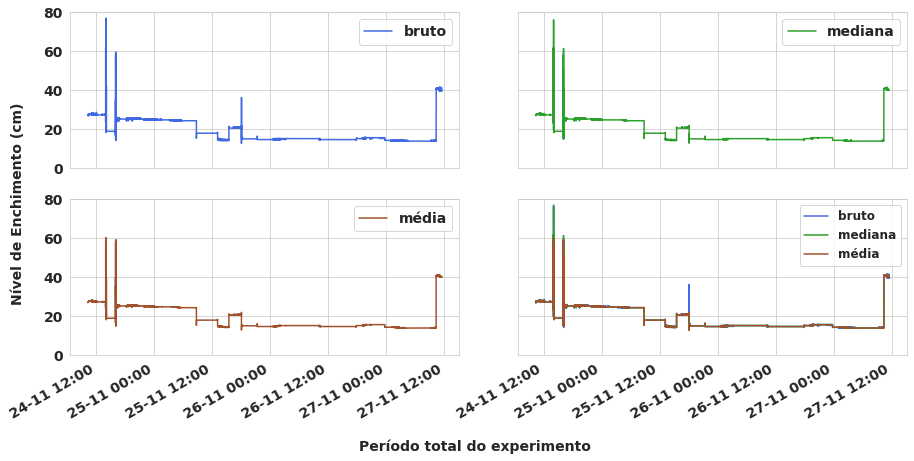

In [102]:
# ajust x axis datetime
# xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
xfmt = mdates.DateFormatter('%d-%m %H:%M')

# chart elements - size settings
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 14

# font = {'family' : 'normal',
#         'weight' : 'bold',
#         'size'   : 14
#        }
# plt.rc('font', **font)

plt.rc('font', size = BIGGER_SIZE)         # controls default text sizes
plt.rc('axes', titlesize = BIGGER_SIZE)    # fontsize of the axes title
plt.rc('axes', labelsize = BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize = BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize = BIGGER_SIZE)   # legend fontsize
plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title


fig, axes = plt.subplots(nrows=2, ncols=2,sharey=True,figsize=(15, 7))

plt.subplots_adjust(wspace=0.15, hspace=0.2)
    
bin_measures_df.plot(kind='line',x="time", y='sonar_raw', label ='bruto', color = 'royalblue',ax=axes[0,0])
bin_measures_df.plot(kind='line',x="time", y='sonar_median', label ='mediana', color = 'tab:green',ax=axes[0,1])
bin_measures_df.plot(kind='line',x="time", y='sonar_mean', label ='média', color = 'sienna',ax=axes[1,0],legend=True)

bin_measures_df.plot(kind='line',x="time", y='sonar_raw', label ='bruto', color = 'royalblue',ax=axes[1,1])
bin_measures_df.plot(kind='line',x="time", y='sonar_median', label ='mediana', color = 'tab:green',ax=axes[1,1])
bin_measures_df.plot(kind='line',x="time", y='sonar_mean',label ='média', color = 'sienna',ax=axes[1,1])


axes[1,1].xaxis.set_major_formatter(xfmt)
axes[1,0].xaxis.set_major_formatter(xfmt)


# axes[0,0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
axes[0,0].xaxis.set_major_formatter(plt.NullFormatter())
axes[0,1].xaxis.set_major_formatter(plt.NullFormatter())

for tick in axes[1,0].get_xticklabels():
    tick.set_rotation(30)
for tick in axes[1,1].get_xticklabels():
    tick.set_rotation(30)


axes[0,0].xaxis.label.set_visible(False)
axes[0,1].xaxis.label.set_visible(False)
axes[1,0].xaxis.label.set_visible(False)
axes[1,1].xaxis.label.set_visible(False)

axes[0,0].set_ylim([0,80]) 
axes[0,1].set_ylim([0,80]) 
axes[1,0].set_ylim([0,80]) 
axes[1,1].set_ylim([0,80]) 

# loc = 1 -> upper right
axes[1,1].legend(loc=1, prop={'size': 12})

# ttl = ax.title
# ttl.set_position([.5, 1.0])

# fig.suptitle("Leituras do Sensor Ultrassônico", fontweight='bold', fontsize = 14, y = 0.96)
plt.xlabel('Período de Teste', fontsize=18,labelpad=30)
plt.ylabel('', fontsize=18, labelpad=30)

# fig.text(x,y)
fig.text(0.5, 0.01, 'Período total do experimento', ha='center', fontweight='bold')
fig.text(0.07, 0.5, 'Nível de Enchimento (cm)', va='center', rotation='vertical', fontweight='bold')

plt.show()

fig.savefig('sonar_filtros.png', bbox_inches='tight')

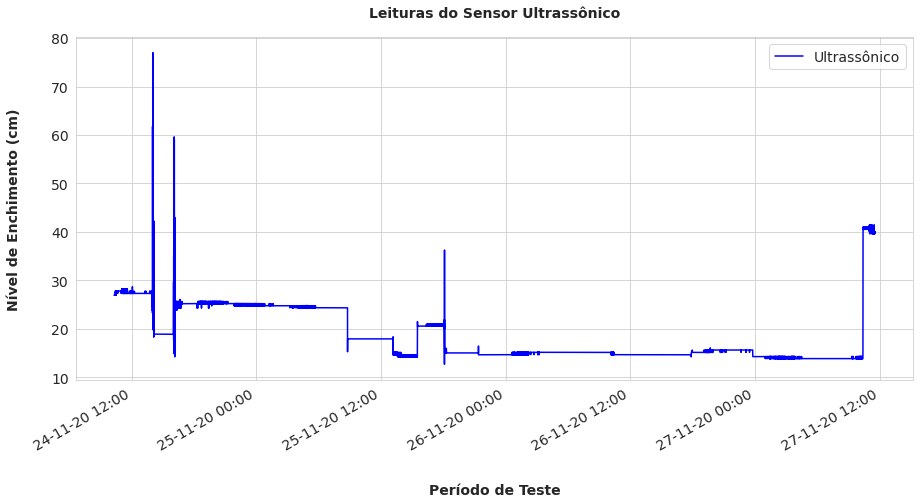

In [8]:
# ajust x axis datetime
# xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
xfmt = mdates.DateFormatter('%d-%m %H:%M')

# graph measures x time
plt.figure(figsize=(15,7))
ax = plt.gca()

bin_measures_df.plot(kind='line',x="time", y='sonar_raw',label='Ultrassônico', color = 'blue', ax=ax)
# bin_measures_df.plot(kind='line',x="time", y='sonar_median', color = 'green', ax=ax)
# bin_measures_df.plot(kind='line',x="time", y='sonar_mean', color = 'brown', ax=ax)

plt.xlabel('Período de Teste', fontweight='bold', fontsize=14,labelpad=30)
plt.ylabel('Nível de Enchimento (cm)', fontweight='bold', fontsize=14, labelpad=30)

# ajust x axis datetime

xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_formatter(xfmt)

ttl = ax.title
ttl.set_position([.5, 1.04])
plt.title('Leituras do Sensor Ultrassônico',fontweight='bold',fontsize=14)

plt.show()

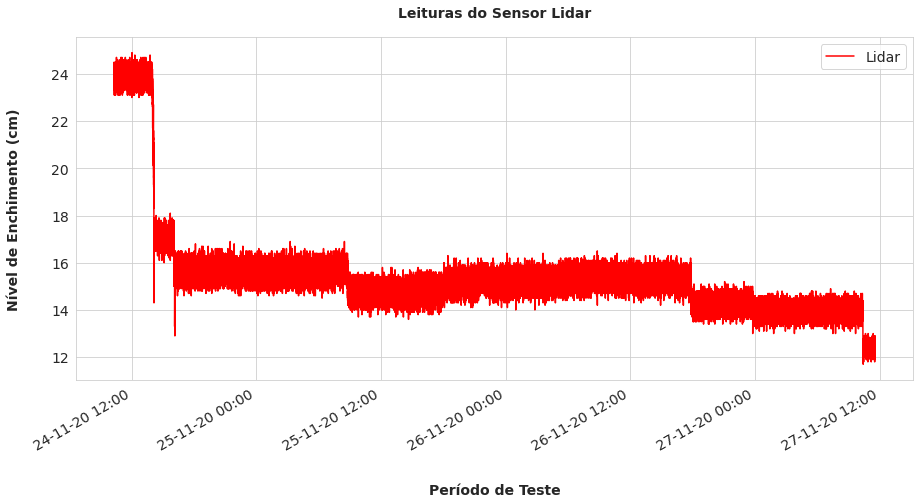

In [9]:
# graph measures x time
plt.figure(figsize=(15,7))
ax = plt.gca()

bin_measures_df.plot(kind='line',x="time", y='lidar_raw',label='Lidar', color = 'red',ax=ax)

plt.xlabel('Período de Teste', fontweight='bold', fontsize=14,labelpad=30)
plt.ylabel('Nível de Enchimento (cm)', fontweight='bold', fontsize=14, labelpad=30)

# ajust x axis datetime

xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_formatter(xfmt)

ttl = ax.title
ttl.set_position([.5, 1.04])
plt.title('Leituras do Sensor Lidar',fontweight='bold',fontsize=14)

plt.show()

In [10]:
# chart 4x1 test
# bin_measures_df.plot(subplots=True, figsize=(6, 6));

In [11]:
# Generate a 4x1 subplot with seaborn

# sns.set(style="whitegrid")

# fig = plt.figure(figsize=(15,7))
# ax = plt.gca()

# plt.subplots_adjust(wspace=0.2, hspace=0.5)

# # Generate a 4x1 subplot.
# # 4, number of rows
# # 1, number of columns
# # subplot group: (2,1,c)

# # chart 1
# plt.subplot(411)
# plt.title('sonar_raw')
# sns.lineplot(data = bin_measures_df, y='sonar_raw', color='blue', x = 'time')

# # chart 2
# plt.subplot(412)
# sns.lineplot(data = bin_measures_df, y='sonar_median', color='green', x = 'time')

# # chart 3
# plt.subplot(413)
# sns.lineplot(data = bin_measures_df, y='sonar_mean', color='brown', x = 'time')

# # chart 4
# plt.subplot(414)
# sns.lineplot(data = bin_measures_df, y='sonar_raw', color='blue', x = 'time')
# sns.lineplot(data = bin_measures_df, y='sonar_median', color='green', x = 'time')
# sns.lineplot(data = bin_measures_df, y='sonar_mean', color='brown', x = 'time')

# plt.show()

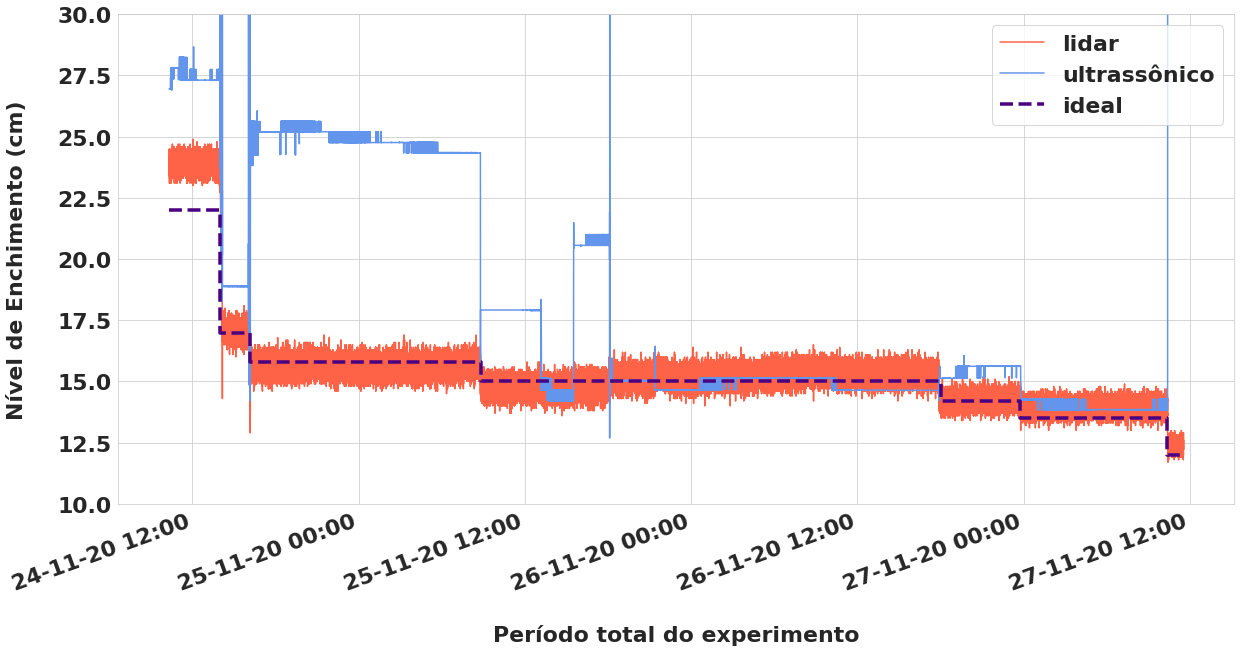

In [98]:
# chart elements - size settings
BIGGER_SIZE = 22
font = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 16
       }
plt.rc('font', **font)
plt.rc('xtick', labelsize = BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('ytick', labelsize = BIGGER_SIZE)   # fontsize of the tick labels
plt.rc('legend', fontsize = BIGGER_SIZE)   # legend fontsize

fig = plt.figure(figsize=(20,10))
ax = plt.gca()

# lidar chart
bin_measures_df.plot(kind='line',x="time", y='lidar_raw',color='tomato', label='lidar', ax=ax)

# sonar chart
bin_measures_df.plot(kind='line',x="time", y='sonar_raw',color='cornflowerblue', label='ultrassônico', ax=ax)

# ideal chart
Data = {'cm_level': [22, 22, 17, 17, 15.8,15.8, 15, 15, 15, 14.2, 14.2, 13.5, 13.5, 12, 12],
        'period': ['2020-11-24 10:18:41.430127', '2020-11-24 14:00', '2020-11-24 14:00', 
                   '2020-11-24 16:10', '2020-11-24 16:10', '2020-11-25 08:50', '2020-11-25 08:50',
                   '2020-11-25 18:00', '2020-11-26 18:00', '2020-11-26 18:00', '2020-11-26 23:45',
                   '2020-11-26 23:45', '2020-11-27 10:20', '2020-11-27 10:20', '2020-11-27 11:30'
                   ]
       }
df = pd.DataFrame(Data,columns=['cm_level','period'])
df['period']= pd.to_datetime(df['period'])
df.plot(kind='line',x="period", y='cm_level', label='ideal', color = 'indigo',
        linestyle='dashed', linewidth=3.5, ax=ax)

plt.ylabel('Nível de Enchimento (cm)', fontweight='bold', fontsize=22, labelpad=30)
plt.xlabel('Período total do experimento', fontweight='bold', fontsize=22,labelpad=30)

# ajust x axis datetime
xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
ax.xaxis.set_major_formatter(xfmt)

for tick in ax.get_xticklabels():
    tick.set_rotation(20)

# zooming axis values
plt.ylim(10, 30)
# plt.xlim('24-11-2020 10:00','25-11-2020 00:00')  # TER - colocando pilhas por dez min (variação 2h)
# plt.xlim('24-11-2020 13:00','24-11-2020 15:00')  # TER - pico 1
# plt.xlim('24-11-2020 16:00','24-11-2020 16:20')    # TER - pico 2
# plt.xlim('25-11-2020 00:00','26-11-2020 00:00')  # QUA - esporádico, colocando 10 pilhas.
# plt.xlim('26-11-2020 00:00','27-11-2020 00:00')  # QUI - esporádico, colocando 10 pilhas. Com falso positivo
# plt.xlim('27-11-2020 00:00','27-11-2020 12:00')  # SEXTA - esporádico, colocando ~2-5 pilhas
# plt.xlim('27-11-2020 10:00','27-11-2020 12:00')  # SEXTA - final experimento

ttl = ax.title
ttl.set_position([.5, 1.03])

plt.show()
fig.savefig('cmp_sensores_geral.png',bbox_inches='tight')

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.
findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


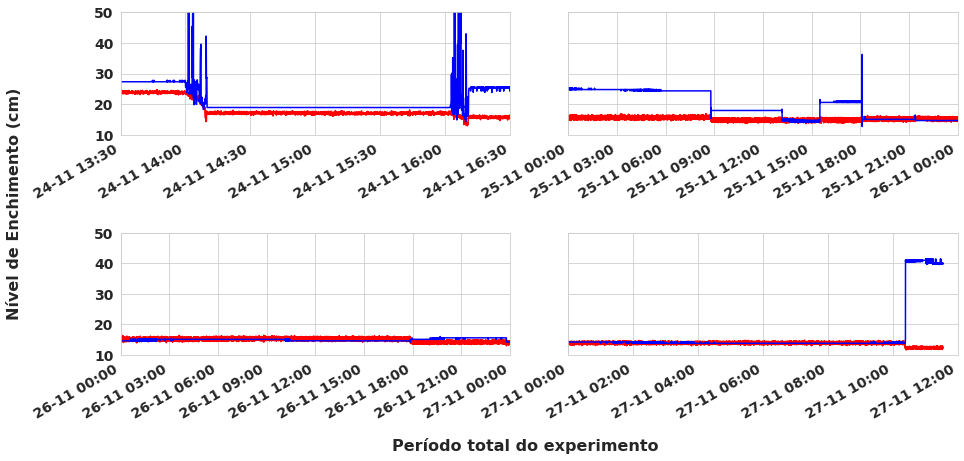

In [13]:
# ajust x axis datetime
# xfmt = mdates.DateFormatter('%d-%m-%y %H:%M')
xfmt = mdates.DateFormatter('%d-%m %H:%M')

# chart elements - size settings
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 22

font = {'family' : 'normal',
#         'weight' : 'bold',
        'size'   : 16
       }
plt.rc('font', **font)

# plt.rc('font', size = BIGGER_SIZE)         # controls default text sizes
# plt.rc('axes', titlesize = BIGGER_SIZE)    # fontsize of the axes title
# plt.rc('axes', labelsize = BIGGER_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize = 14)   # fontsize of the tick labels
plt.rc('ytick', labelsize = 14)   # fontsize of the tick labels
plt.rc('legend', fontsize = 14)   # legend fontsize
# plt.rc('figure', titlesize = BIGGER_SIZE)  # fontsize of the figure title

fig, axes = plt.subplots(nrows=2, ncols=2, sharey=True,figsize=(15, 7))

plt.subplots_adjust(wspace=0.15, hspace=0.8)
# plt.gca().xaxis.set_major_locator(plt.NullLocator())
# plt.gca().yaxis.set_major_locator(plt.NullLocator())

    
bin_measures_df.plot(kind='line',x="time", y='lidar_raw', color = 'red', legend=False, ax=axes[0,0])
bin_measures_df.plot(kind='line',x="time", y='sonar_raw', color = 'blue', legend=False, ax=axes[0,0])

bin_measures_df.plot(kind='line',x="time", y='lidar_raw', color = 'red', legend=False, ax=axes[0,1])
bin_measures_df.plot(kind='line',x="time", y='sonar_raw', color = 'blue', legend=False, ax=axes[0,1])

bin_measures_df.plot(kind='line',x="time", y='lidar_raw', color = 'red', legend=False, ax=axes[1,0])
bin_measures_df.plot(kind='line',x="time", y='sonar_raw', color = 'blue', legend=False, ax=axes[1,0])

bin_measures_df.plot(kind='line',x="time", y='lidar_raw', color = 'red', legend=False, ax=axes[1,1])
bin_measures_df.plot(kind='line',x="time", y='sonar_raw', color = 'blue', legend=False, ax=axes[1,1])


# formater each x axis with '%d-%m-%y %H:%M'
axes[0,0].xaxis.set_major_formatter(xfmt)
axes[0,1].xaxis.set_major_formatter(xfmt)
axes[1,0].xaxis.set_major_formatter(xfmt)
axes[1,1].xaxis.set_major_formatter(xfmt)


# axes[0,0].yaxis.set_major_locator(plt.MaxNLocator(integer=True))
# axes[0,0].xaxis.set_major_formatter(plt.NullFormatter())
# axes[0,1].xaxis.set_major_formatter(plt.NullFormatter())

for tick in axes[1,0].get_xticklabels():
    tick.set_rotation(30)
for tick in axes[1,1].get_xticklabels():
    tick.set_rotation(30)

# hide 'time'
axes[0,0].xaxis.label.set_visible(False)
axes[0,1].xaxis.label.set_visible(False)
axes[1,0].xaxis.label.set_visible(False)
axes[1,1].xaxis.label.set_visible(False)

# x and y zoom bounds 

# dia 24
axes[0,0].set_ylim([10,50]) 
axes[0,0].set_xlim('24-11-2020 13:30','24-11-2020 16:30')  

# dia 25
axes[0,1].set_ylim([10,50]) 
axes[0,1].set_xlim('25-11-2020 00:00','26-11-2020 00:00')  

# dia 26
axes[1,0].set_ylim([10,50]) 
axes[1,0].set_xlim('26-11-2020 00:00','27-11-2020 00:00')  

# dia 25
axes[1,1].set_ylim([10,50]) 
axes[1,1].set_xlim('27-11-2020 00:00','27-11-2020 12:00')  


# fig.suptitle("Comparativo de sensores em detalhes", fontweight='bold', fontsize = 14, y = 0.96)
plt.xlabel('Período de Teste', fontsize=22,labelpad=30)
plt.ylabel('', fontsize=22, labelpad=30)

# fig.text(x,y)
fig.text(0.5, 0.01, 'Período total do experimento', ha='center', fontweight='bold')
fig.text(0.02, 0.5, 'Nível de Enchimento (cm)', va='center', rotation='vertical', fontweight='bold')

plt.show()

# bbox_inches='tight' -> remove white space
fig.savefig('cmp_sensores_especifico.png', bbox_inches='tight')

In [14]:
bin_measures_df.lidar_raw.value_counts()

15.4    6046
15.3    5219
15.1    5030
15.2    4982
15.5    4919
        ... 
24.9       1
11.7       1
18.5       1
20.3       1
20.9       1
Name: lidar_raw, Length: 128, dtype: int64

In [15]:
# bins = [12,15, 16.5,18, 19.5,21,22.5,24, 25.5,27]
bins = [12, 15, 18, 21, 24, 27]
df_lidar = bin_measures_df.copy()
df_lidar = df_lidar.groupby(pd.cut(bin_measures_df['lidar_raw'], bins=bins)).lidar_raw.count()

df_lidar.head()

lidar_raw
(12, 15]    38274
(15, 18]    45277
(18, 21]       52
(21, 24]     3469
(24, 27]     1086
Name: lidar_raw, dtype: int64

findfont: Font family ['normal'] not found. Falling back to DejaVu Sans.


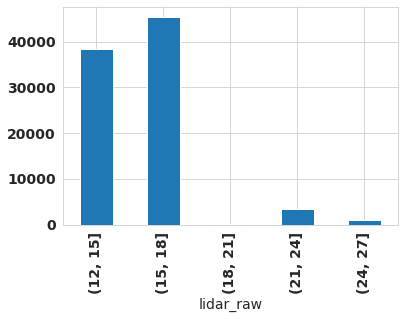

In [16]:
# ax = dataFrame.plot.bar(rot=0, color="b", figsize=(6,4))
df_lidar.plot(kind='bar')

# ax = dataFrame.plot.bar(rot=0, color="b", figsize=(6,4))
plt.show()